In [1]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ITERATION = 10_000

def rule_of_five(series: pd.Series, median: float) -> bool:
    sample = series.sample(5)
    return sample.min() < median < sample.max()

def test_rule_of_five(series: pd.Series, iteration: int = ITERATION) -> list[bool]:
    median = series.median()
    return pd.Series([rule_of_five(series, median) for _ in range(iteration)])

## Avocado price

In [3]:
# Define the dataset URL
dataset = 'https://www.kaggle.com/datasets/neuromusic/avocado-prices'

# Using opendatasets let's download the data sets
od.download(dataset, data_dir='./data')

Skipping, found downloaded files in "./data/avocado-prices" (use force=True to force download)


In [4]:
# Load the data into a pandas dataframe
df = pd.read_csv('./data/avocado-prices/avocado.csv', index_col=0)

# Display the first few rows of the dataframe
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


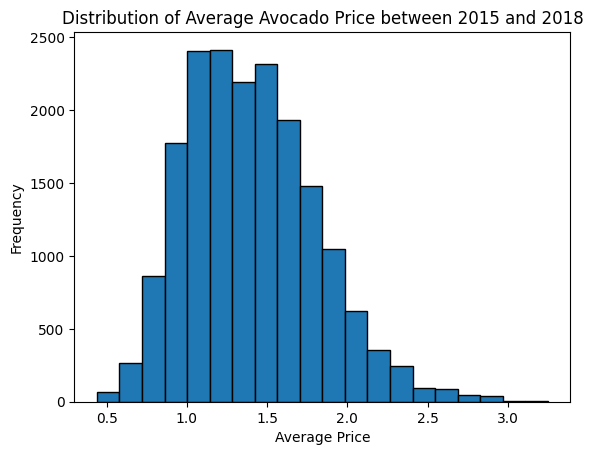

In [5]:
df["AveragePrice"].plot.hist(bins=20, edgecolor='black')

plt.title('Distribution of Average Avocado Price between 2015 and 2018')
plt.xlabel('Average Price')

plt.show()

In [6]:
result = test_rule_of_five(df["AveragePrice"])

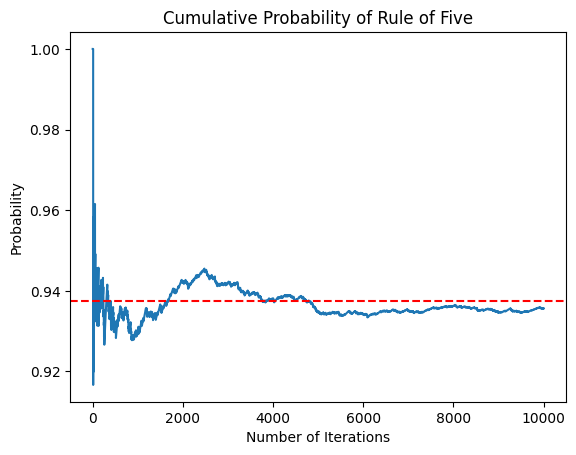

In [7]:
cumul_proba = result.cumsum() / (result.index + 1)

cumul_proba.plot()
plt.axhline(0.9375, color='red', linestyle='--')

plt.title('Cumulative Probability of Rule of Five')
plt.xlabel('Number of Iterations')
plt.ylabel('Probability')

plt.show()

## Fitbit Data

In [8]:
fitbit_dataset = 'https://www.kaggle.com/datasets/arashnic/fitbit'

od.download(fitbit_dataset, data_dir='./data')

Skipping, found downloaded files in "./data/fitbit" (use force=True to force download)


In [9]:
# Load the data into a pandas dataframe
df = pd.read_csv('./data/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv')

# Display the first few rows of the dataframe
df.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [10]:
# Get the user id with the most heart rate data
id_with_most_data = df["Id"].value_counts().idxmax()

# Extract the heart rate data for this user and display the summary statistics
heart_rate = df[df["Id"] == id_with_most_data]["Value"]
heart_rate.describe()

count    285461.000000
mean         82.300577
std          15.911590
min          46.000000
25%          70.000000
50%          83.000000
75%          93.000000
max         191.000000
Name: Value, dtype: float64

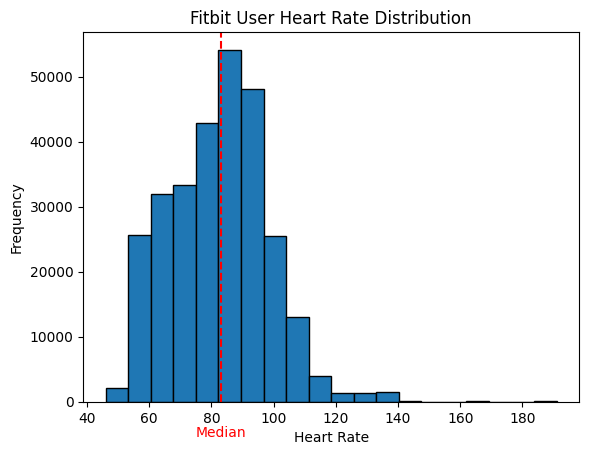

In [11]:
# Plot the distribution of heart rate data and mark the median
heart_rate.plot.hist(bins=20, edgecolor='black')

plt.title('Fitbit User Heart Rate Distribution')
plt.xlabel('Heart Rate')

plt.axvline(heart_rate.median(), color='red', linestyle='--')
plt.annotate('Median', (heart_rate.median(), 0), textcoords="offset points", xytext=(0, -25), ha='center', color='red')

plt.show()

In [15]:
result = test_rule_of_five(heart_rate, iteration=100_000)

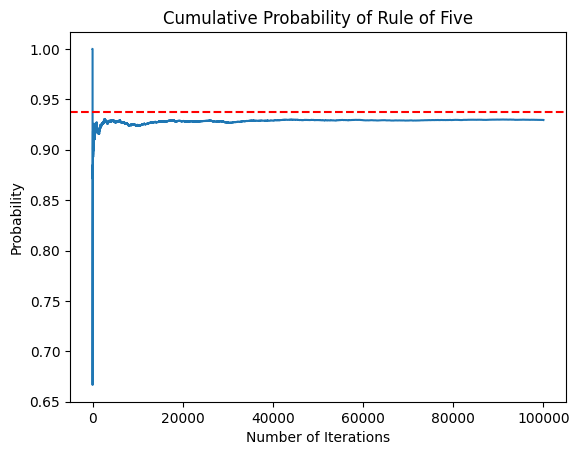

In [16]:
cumul_proba = result.cumsum() / (result.index + 1)

cumul_proba.plot()
plt.axhline(0.9375, color='red', linestyle='--')

plt.title('Cumulative Probability of Rule of Five')
plt.xlabel('Number of Iterations')
plt.ylabel('Probability')

plt.show()